# Mechanical Vibrations using RK method.

In this project, we will solve the second order differential equation of mechanical vibration using few Numerical Methods.

First we will solve the equation by **Euler's Method** and review it. Later we will solve it by **Runge-Kutta Method**.

## Solving Single Degree of Freedom vibration using State-Space form.

The second order differentail equation is as follows

$$m \ddot x + c \dot x + kx = f(t) \tag{1}$$

Writing the above equation in State-Space form
$$\begin{align} \vec Y = 
\left[ \begin{array}{c}
\dot x\\x\end{array}\right]\end{align} \tag{2}$$

$$\begin{align} \dot{\vec Y} = 
\left[ \begin{array}{c}
\ddot x\\ \dot x\end{array}\right]\end{align} \tag{3}$$

Writing the equation in Matrix form :-
$$\begin{align} 
\left[ \begin{array}{cc}
m & 0\\
0 & 1
\end{array}\right]
\left[ \begin{array}{c}
\ddot x\\ \dot x\end{array}\right] + 
\left[ \begin{array}{cc}
c & k\\
-1 & 0
\end{array}\right]
\left[ \begin{array}{c}
\dot x\\x\end{array}\right] = 
\left[ \begin{array}{c}
f(t) \\  0\end{array}\right]\tag{4} \end{align}$$

Using Matrix A, B and F :-
$$\begin{align} 
\left[ \begin{array}{cc}
A
\end{array}\right]
\left[ \begin{array}{c}
\ddot x\\ \dot x\end{array}\right] + 
\left[ \begin{array}{cc}
B
\end{array}\right]
\left[ \begin{array}{c}
\dot x\\x\end{array}\right] = 
\left[ \begin{array}{c}
\vec F\end{array}\right]\end{align}$$

From (2), (3) and (4) : -
$$\begin{align} 
\left[ \begin{array}{cc}
A
\end{array}\right]
\left[ \begin{array}{c}
\dot{\vec Y}\end{array}\right] + 
\left[ \begin{array}{cc}
B
\end{array}\right]
\left[ \begin{array}{c}
\vec Y\end{array}\right] = 
\left[ \begin{array}{c}
\vec F\end{array}\right]\tag{5}\end{align}$$

$$\begin{align} 
\left[ \begin{array}{c}
\dot{\vec Y}\end{array}\right] =
\left[ \begin{array}{cc}
A
\end{array}\right]^{-1}\cdot
\left( \left[ \begin{array}{c}
\vec F\end{array}\right] - 
\left[ \begin{array}{cc}
B
\end{array}\right]\cdot
\left[ \begin{array}{c}
\vec Y\end{array}\right]\right)
\tag{6}\end{align}$$

Discretizing (6) :-
$$\dot{\vec Y} = \frac{\vec Y_{(t + h)} - \vec Y_{(t)}}{\Delta t}$$

$$\begin{align} 
\frac{\vec Y_{(t + h)} - \vec Y_{(t)}}{\Delta t} =
\left[ \begin{array}{cc}
A
\end{array}\right]^{-1}\cdot
\left( \left[ \begin{array}{c}
\vec F\end{array}\right] - 
\left[ \begin{array}{cc}
B
\end{array}\right]\cdot
\left[ \begin{array}{c}
\vec Y\end{array}\right]\right)
\end{align}$$

$$\begin{align} 
\vec Y_{(t + h)} =
\vec Y_{(t)} + \Delta t \cdot
\left[ \begin{array}{cc}
A
\end{array}\right]^{-1}\cdot
\left( \left[ \begin{array}{c}
\vec F\end{array}\right] - 
\left[ \begin{array}{cc}
B
\end{array}\right] \cdot
\left[ \begin{array}{c}
\vec Y\end{array}\right]\right)
\tag{7}\end{align}$$

The above equation is called an Explicit Numerical Integrator because the value of $\vec Y_{(t + h)}$ depends on $\vec Y_{(t)}$

Initial condition is :-
$$\vec Y_0 = \left[\begin{array}{c}
\dot x_0\\ x_0\end{array}\right]\tag{8}$$

We require 2 initial conditions because the D.E is of the second order.

-----
## Testing the Numerical Integrator.
To gauge the accuracy of the Integrator, we will use *'Law of conservation of energy'.*<br>
**For free vibrations, the Kinetic and Potential Energy remains constant.** Like a pendulum which will keep on swinging if there is no loss of energy. 

Kinectic energy: -$$T = \frac{1}{2}m\dot x^2$$
Potential energy: -$$V = \frac{1}{2}kx^2$$
For Free Vibrations: -$$T + V = constant$$

------
## Let's code!

In [1]:
# Title : Numerical solution of SDOF vibration
# Author: Parmeshwar Prajapati
# Date  : 15/07/2020

# Importing Modules
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing()

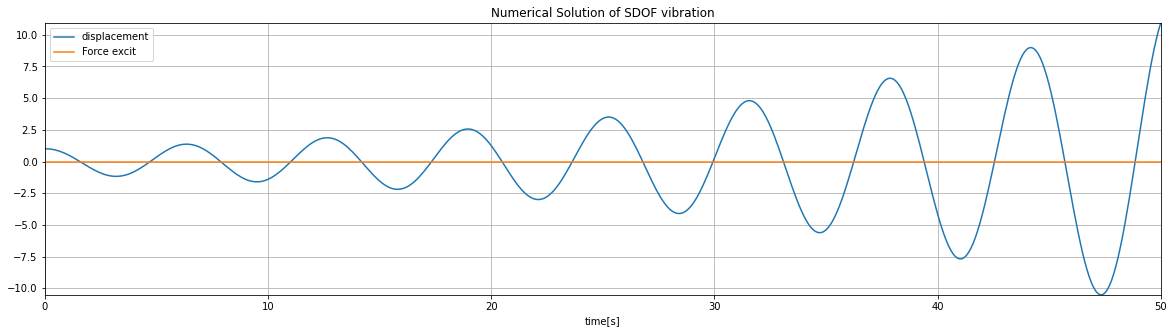

In [5]:
# Time
dt = 0.1                         # Step
time_start = 0                   # start time(s)
time_end   = 50                  # end time(s)
time = np.arange(time_start, time_end + dt, dt)

# Variables
m = 2.0                          # mass(kg)
k = 2.0                          # stiffness(N/m)
c = 0.0                          # dampning(N-s/m)
F_excite_mag = 0.0               # exciting force(N)
freq_F = 0.159                   # frequency of exciting force(Hz)
omega = 2*np.pi*freq_F           # angular velocity(radians)
#omega = 1.0                     # angular velocity(radians)
velocity_init = 0.0              # Initial velocity(m/s)
displacement_init = 1.0          # Initial displacement(m)

# Initializing
A_matrix = np.array([[m, 0],     # 'A' matrix
                     [0, 1]])

B_matrix = np.array([[c, k],     # 'B' matrix
                    [-1, 0]])

Y_matrix = np.array([velocity_init, displacement_init])  # 'Y' matrix with initial velocity and displacement value.

velocity = np.empty_like(time)                           # velocity storage
displacement = np.empty_like(time)                       # displacement storage
Force_excite = np.empty_like(time)                       # Exciting force storage
Force_excite = F_excite_mag*np.cos((omega*time))         # Exciting force value appending
velocity[0] = velocity_init                              # Initializing the velocity value
displacement[0] = displacement_init                      # Initializing the displacement value

F_matrix = np.array([Force_excite, 0])                   # Force matrix

# Calculation using Euler's Method
for t in range(1, len(time)):
    Y_matrix = Y_matrix + dt*(np.matmul(np.linalg.inv(A_matrix), F_matrix[0][t] - np.matmul(B_matrix, Y_matrix))) # Calculation
    velocity[t] = Y_matrix[0]                      # velocity value appending
    displacement[t] = Y_matrix[1]                  # displacement value appending


# Plotting
plt.figure(figsize = (20, 5))
plt.plot(time, displacement, label = 'displacement')
#plt.plot(time, displacement, label = 'velocity', linestyle = '--')
plt.plot(time, Force_excite, label = 'Force excit')
plt.axis([0, time[-1], min(displacement), max(displacement)])
plt.title('Numerical Solution of SDOF vibration')
plt.xlabel('time[s]')
plt.legend()
plt.grid(True)
plt.show()

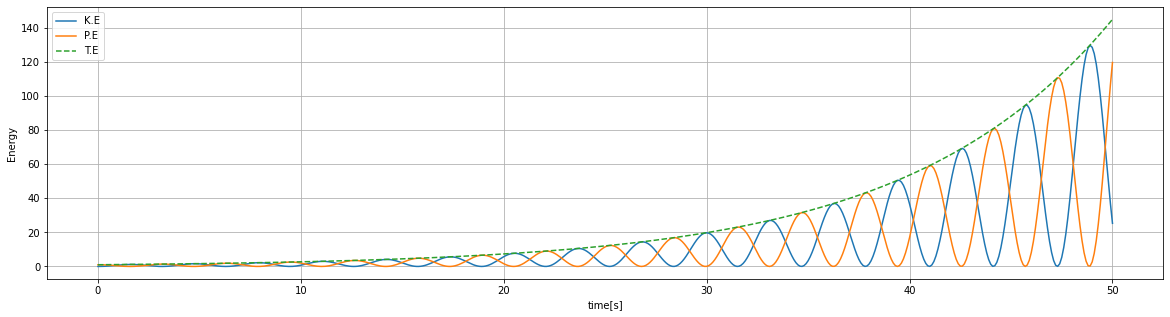

In [7]:
# Energy conservation
T = 0.5*m*velocity**2            # Kinetic energy
V = 0.5*k*displacement**2        # Potential energy
Total = T + V                    # Total energy

plt.figure(figsize = (20, 5))
plt.plot(time, T, label = 'K.E')
plt.plot(time, V, label = 'P.E')
plt.plot(time, Total, label = 'T.E', linestyle = '--')
plt.xlabel('time[s]')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.show()

## Validation
We were expecting a constant amplitude as the excitation force is zero. But from the figure above we can deduce that the Euler's Method is **unstable** as the **Amplitude and Total Energy keeps on increasing**.

## Conclusion
Euler's Method is unstable.

-----
## Runge-Kutta Integrator
Now we will use Runge-Kutta Integrator to solve the Differential Equation.

#### Problem with Euler's Method: -
1) The error keeps on adding up.<br>
2) Euler's Method is a **Linear Method** which is not suitable for non-linear problems.

## Taylor's Series
$$\begin{align}
f(x) = f(0) + xf'(0) + \frac{x^2f''(0)}{2!} + \frac{x^3f'''(0)}{3!} + \frac{x^4f''''(0)}{4!} + \frac{x^5f'''''(0)}{5!} + ....\end{align}$$

Our function can be written as :-
$$\begin{align}
\vec Y(x + \delta t) &= \vec Y(x) + \delta t \dot{\vec Y(x)} + \frac{\delta t^2 \ddot{\vec Y(x)}}{2!}
                       + \frac{\delta t^3 \dddot{\vec Y(x)}}{3!}  + \frac{\delta t^4 \ddddot{\vec Y(x)}}{4!} +.... \tag{1}\\ 
                       \vec Y(t + 1) &= \vec Y(t) + \delta t \dot{\vec Y(t)} + \frac{\delta t^2 \ddot{\vec Y(t)}}{2!}
                       + \frac{\delta t^3 \dddot{\vec Y(t)}}{3!}  + \frac{\delta t^4 \ddddot{\vec Y(t)}}{4!} + ....\tag{2}\end{align}$$

Now $\dot{\vec Y}$ is,
$\begin{align} 
\dot{\vec Y} =
\left[ \begin{array}{cc}
A
\end{array}\right]^{-1}\cdot
\left( \left[ \begin{array}{c}
\vec F\end{array}\right] - 
\left[ \begin{array}{cc}
B
\end{array}\right]\cdot
\left[ \begin{array}{c}
\vec Y\end{array}\right]\right)
\end{align}$

Let 
$\begin{align} 
\dot{\vec Y} &= \vec G_t\\
\dot{\vec Y} &= \frac{\vec Y_{(t + 1)} - \vec Y_{(t)}}{\Delta t}\\
\therefore
\vec G_t &= \frac{\vec Y_{(t + 1)} - \vec Y_{(t)}}{\Delta t}\\
\vec Y_{(t + 1)} &= \vec Y_{(t)} + \vec G_t \Delta t\tag{3}\end{align}$

Using (2)
$\begin{align}\vec Y(t + 1) &= \vec Y(t) + \delta t \vec G_t + \frac{\delta t^2 \dot{\vec G_t}}{2!}
                       + \frac{\delta t^3 \ddot{\vec G_t}}{3!}  + \frac{\delta t^4 \dddot{\vec G_t)}}{4!} + ....\tag{4}\\
                       \vec Y(t + 1) &= \vec Y(t) + \delta t \left[\vec G_t + \frac{\delta t \dot{\vec G_t}}{2!}
                       + \frac{\delta t^2 \ddot{\vec G_t}}{3!}  + \frac{\delta t^3 \dddot{\vec G_t)}}{4!} + ....\right]\tag{5}
                       \end{align}$

The above equation is of the form of (3) and the term
$$\vec G_t + \frac{\delta t \dot{\vec G_t}}{2!}+ \frac{\delta t^2 \ddot{\vec G_t}}{3!}  + \frac{\delta t^3 \dddot{\vec G_t)}}{4!} + ....$$ is called **Average slope.**


## The Runge-Kutta Integrator can be written as :-
$$\vec Y_{(t + 1)} = \vec Y_{(t)} + (a_1k_1 + a_2k_2 + a_3k_3 + a_4k_4) \Delta t + ....$$

where, a = weights and k = slopes

## Using RK4 method to solve SDOF vibration. 

Suppose you have a derivative

$$\begin{align}
\dot x &= f(x, t)\\
\end{align}$$

To find the average slope
$$\begin{align}
k1 &= f(x, t)\\
k2 &= f(x + \frac{h}{2}k1, t + \frac{h}{2})\\
k3 &= f(x + \frac{h}{2}k2, t + \frac{h}{2})\\
k4 &= f(x + hk3, t + h)\\
\end{align}$$

The average slope is 
$$Avg \space slope = \frac{(k1 + 2k2 + 2k3 + k4)}{6}$$

---------

## Let's code again!

In [17]:
# Title : Numerical solution of SDOF vibration using Runge-Kutta Method
# Author: Parmeshwar Prajapati
# Date  : 21/07/2020

# Time Series
start_time = 0                      # Start time                                          
final_time = 50                     # Final time
dt = 0.1                            # Step
time = np.arange(start_time, final_time + dt, dt)

# Variables
m = 2.0                             # Mass(kg)
k = 2.0                             # Spring stiffness(N/m)
c = 0.0                             # Damping(N-s/m)
excite_Force_mag = 0.0              # Magnitude of external excitation force(N)
freq_excite_Force = 0.159           # Frequency of external excitation force(Hz)
omega = 2*np.pi*freq_excite_Force   # Angular velocity in (rad/s)

# Initialize
velocity_init = 0.0                 # Initial velocity
displacement_init = 1.0             # Initial displacement


# Functions
# Exciting Force Function
def excite_Force(excite_Force_mag, omega, time):
    return excite_Force_mag*np.cos(omega*time)


# Y_dot Function
def y_dot(Y_matrix, time):
    return np.matmul(np.linalg.inv(A_matrix), F_matrix - np.matmul(B_matrix, Y_matrix))


# Runge-Kutta Function
def RK4(Y_matrix, time):
    k1 = y_dot(Y_matrix, time)
    k2 = y_dot(Y_matrix + 0.5*dt*k1, time + 0.5*dt)
    k3 = y_dot(Y_matrix + 0.5*dt*k2, time + 0.5*dt)
    k4 = y_dot(Y_matrix + dt*k3, time + dt)
    return (k1 + 2*k2 + 2*k3 + k4)/6


# A Matrix
A_matrix = np.array([[m, 0],     
                     [0, 1]])
# B Matrix
B_matrix = np.array([[c, k],     
                    [-1, 0]])
# Y Matrix
Y_matrix = np.array([velocity_init, displacement_init])

# Storage for calculated values
velocity = np.empty_like(time)      # velocity storage
displacement = np.empty_like(time)  # displacement storage
velocity[0] = velocity_init         # Initializing the velocity value
displacement[0] = displacement_init # Initializing the displacement value

# Calculation
# **Note the initial time
for t in range(0, len(time) - 1):   
    F_matrix = np.array([excite_Force(excite_Force_mag, omega, time[t]), 0]) # Force Matrix
    Y_matrix = Y_matrix + dt*RK4(Y_matrix, time[t])                          # Calculating Y
    velocity[t + 1] = Y_matrix[0]                                            # Velocity appending
    displacement[t + 1] = (Y_matrix[1])                                      # displacement appending

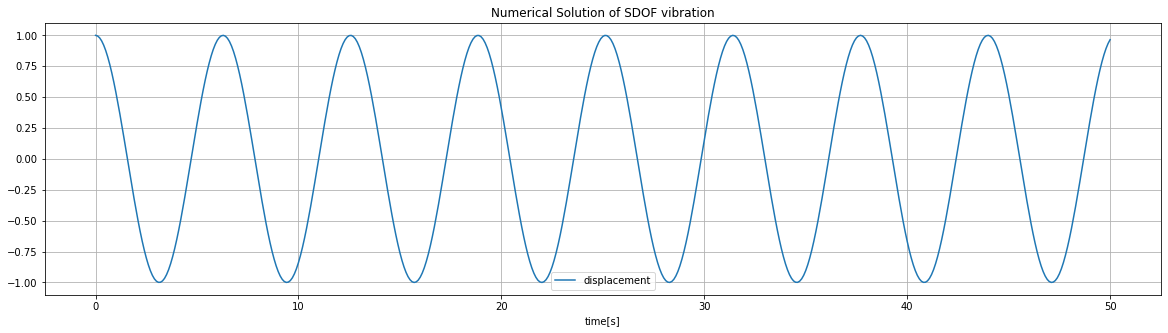

In [18]:
# Plotting
plt.figure(figsize = (20, 5))
plt.plot(time, displacement, label = 'displacement')
#plt.plot(time, velocity, label = 'velocity', linestyle = '--')
#plt.plot(time, Force_excite, label = 'Force excit')
#plt.axis([0, time[-1], min(displacement), max(displacement)])
plt.title('Numerical Solution of SDOF vibration')
plt.xlabel('time[s]')
plt.legend()
plt.grid(True)
plt.show()

#### As you can see it is better than Euler's Method.

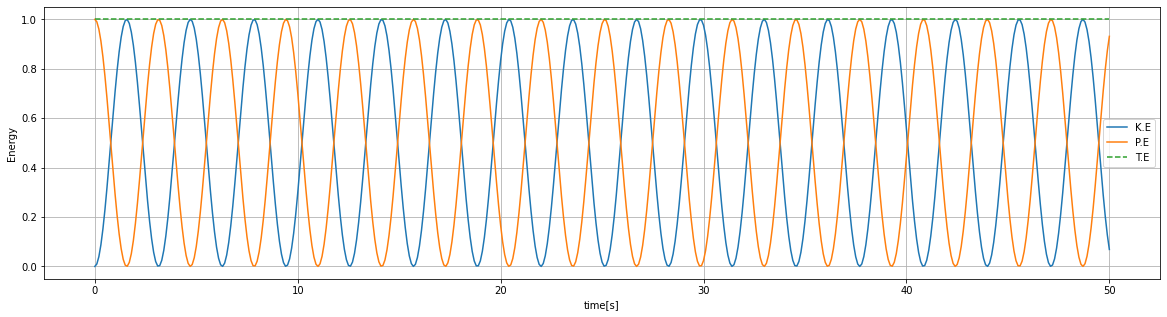

In [19]:
# Energy conservation
T = 0.5*m*velocity**2            # Kinetic energy
V = 0.5*k*displacement**2        # Potential energy
Total = T + V                    # Total energy

plt.figure(figsize = (20, 5))
plt.plot(time, T, label = 'K.E')
plt.plot(time, V, label = 'P.E')
plt.plot(time, Total, label = 'T.E', linestyle = '--')
plt.xlabel('time[s]')
plt.ylabel('Energy')
#plt.axis([time[0], 3, min(T), max(T)])
plt.legend()
plt.grid(True)
plt.show()

* Putting dt = 0.1 in Euler's Method gives unstable solution.
* Putting dt = 0.1 in Runge-Kutta's Method gives stable solution.

## Validation
- The amplitude remains constant which is what we expect.
- The Total energy remains constant which is what we expect.

## Conclusion
Runge-Kutta Method is better than Euler's Method in solving the vibration equation.